## Capstone Project 

Table of content

1. Introduction
2. Goal
3. Import  Datset & libraries
4. Overview
5. EDA
6. Data Pre-processing
7. Splitting
8. Modelling
9. Oversampling
10. Conclusions
11. References

Introduction

We are going to use the 'E Commerce Dataset' and 'E Comm details' Excel files to understand who leaves the company and we run a model to make a churn prediction 

Goal

We use the Churn feature as our target variable to study the comparasion between Churn and other features to get a good prediction to reduce the Churn for the company

Import  Datset & libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px


Overview

The Dataset has 20 features and 5630 observations. 15 of these 20 columns are numerical and the other 5 are categorical

Variables Description

In [2]:
df_info = pd.read_excel('E Comm details.xlsx')
selected_columns = df_info[["Unnamed: 2", "Unnamed: 3"]]
selected_columns = selected_columns.rename(columns={"Unnamed: 2": "Column 1", "Unnamed: 3": "Column 2"})
df_info = selected_columns
df_info

,Column 1,Column 2
0,Variable,Discerption
1,CustomerID,Unique customer ID
2,Churn,Churn Flag
3,Tenure,Tenure of customer in organization
4,PreferredLoginDevice,Preferred login device of customer
5,CityTier,City tier
6,WarehouseToHome,Distance in between warehouse to home of customer
7,PreferredPaymentMode,Preferred payment method of customer
8,Gender,Gender of customer
9,HourSpendOnApp,Number of hours spend on mobile application or...


In [3]:
df = pd.read_excel('E Commerce Dataset.xlsx')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.shape

(5630, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Churn Distribution : target Variable. 0 as no Churn, 1 as Churn

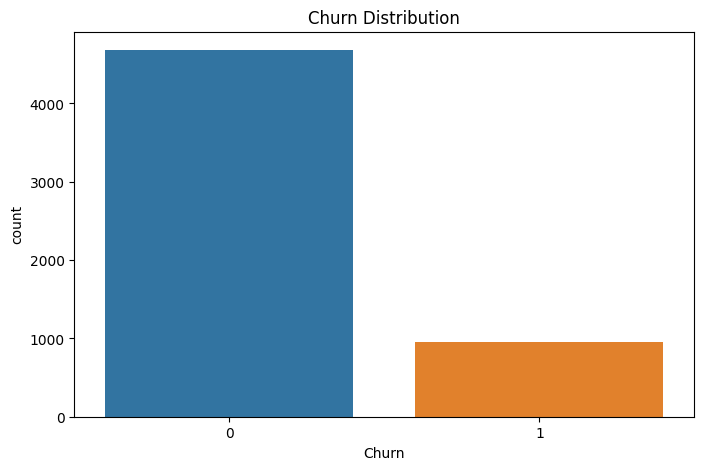

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [8]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['Gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    annotations=[dict(text='Gender', x=0.14, y=0.4, font_size=18, showarrow=False),
                 dict(text='Churn', x=0.80, y=0.4, font_size=18, showarrow=False)])
fig.show()

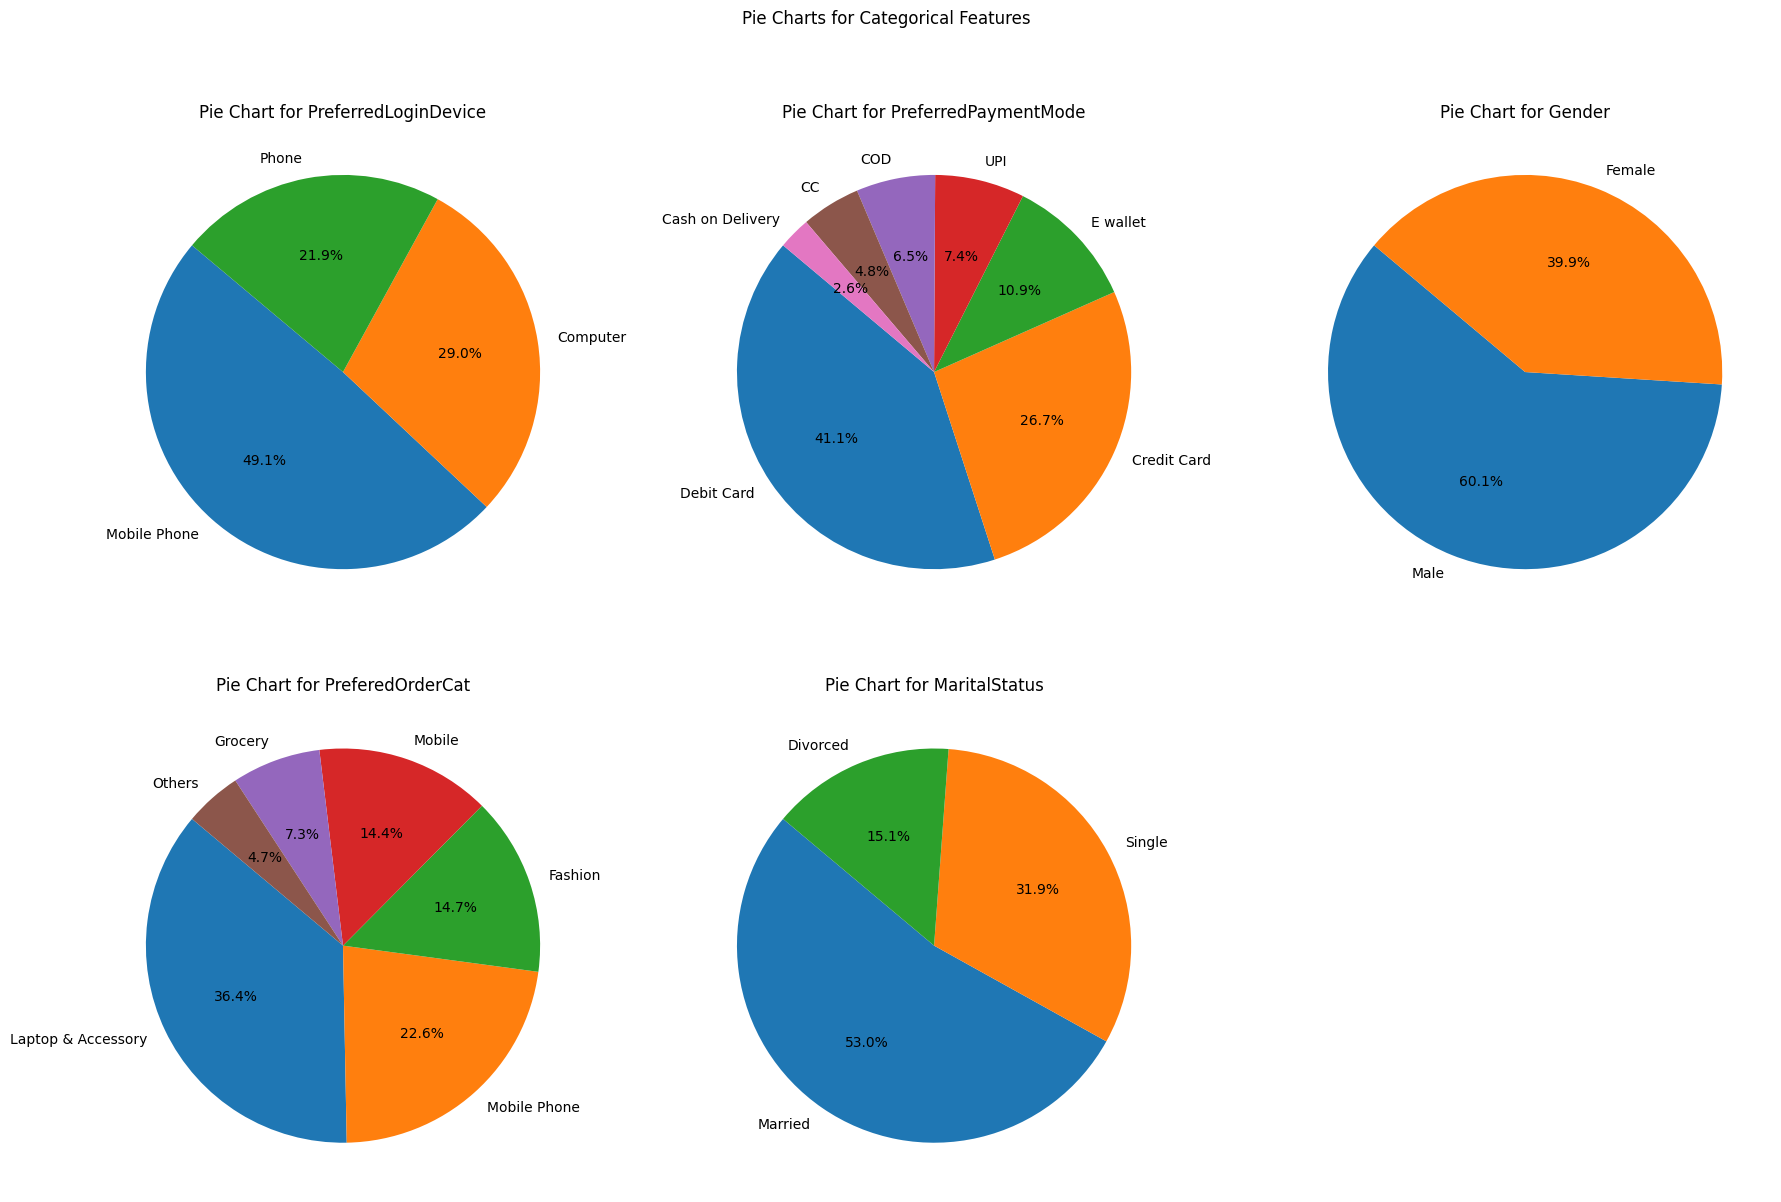

In [9]:
plt.figure(figsize=(18, 12))

for i, feature in enumerate(df.select_dtypes(include=['object']).columns, 1):
    plt.subplot(2, 3, i) 

    labels = df[feature].value_counts().index
    sizes = df[feature].value_counts().values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    
    plt.title(f'Pie Chart for {feature}')

plt.suptitle('Pie Charts for Categorical Features', y=1.02)
plt.tight_layout()
plt.show()

Churn by Preferred Payment Mode

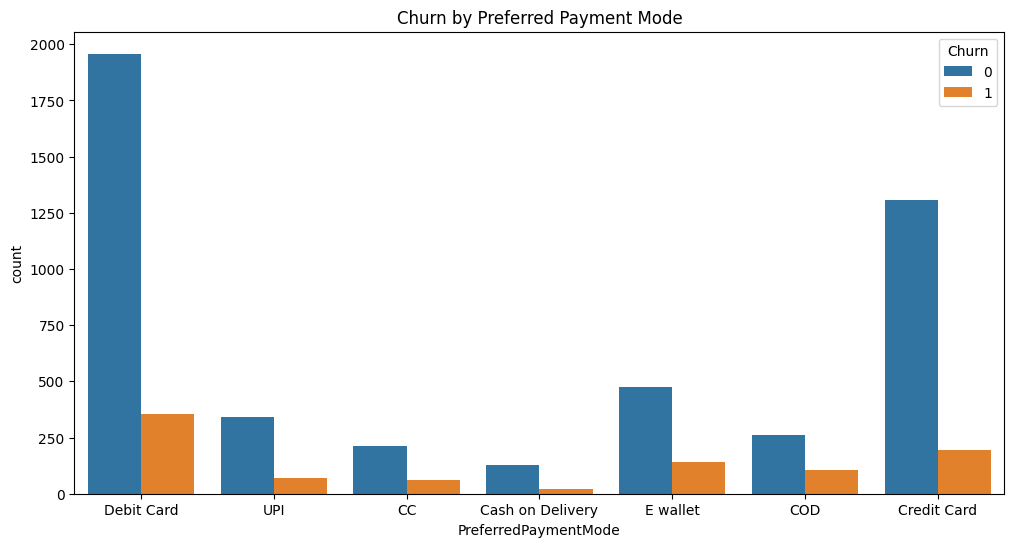

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='PreferredPaymentMode', hue='Churn', data=df)
plt.title('Churn by Preferred Payment Mode')
plt.show()

In [11]:
value_counts = df['PreferredPaymentMode'].value_counts()
relative_frequencies = value_counts / len(df)

subtable = pd.DataFrame({'State': value_counts.index, 
                         'Frequency': value_counts.values, 
                         'Relative Frequency': relative_frequencies.values})
subtable

,State,Frequency,Relative Frequency
0,Debit Card,2314,0.411012
1,Credit Card,1501,0.266607
2,E wallet,614,0.109059
3,UPI,414,0.073535
4,COD,365,0.064831
5,CC,273,0.048490
6,Cash on Delivery,149,0.026465


As we saw in the PieChart, Statitic relative frequency is confirming us that Debit card is the most used method to pay qith 41.1% of relative frequency.

Churn by Preferred Login Device

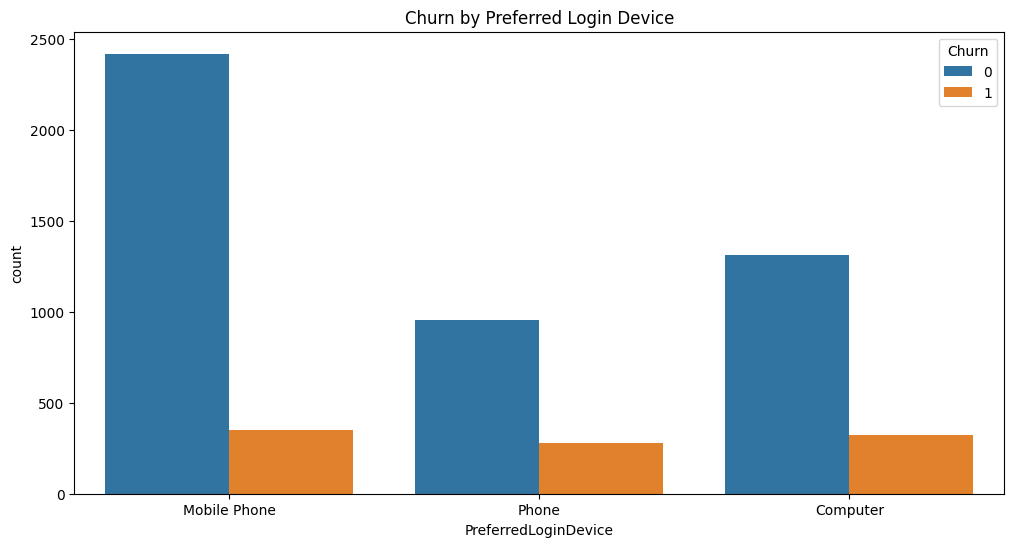

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x='PreferredLoginDevice', hue='Churn', data=df)
plt.title('Churn by Preferred Login Device')
plt.show()

Churn by HourSpendOnApp and SatisfactionScore

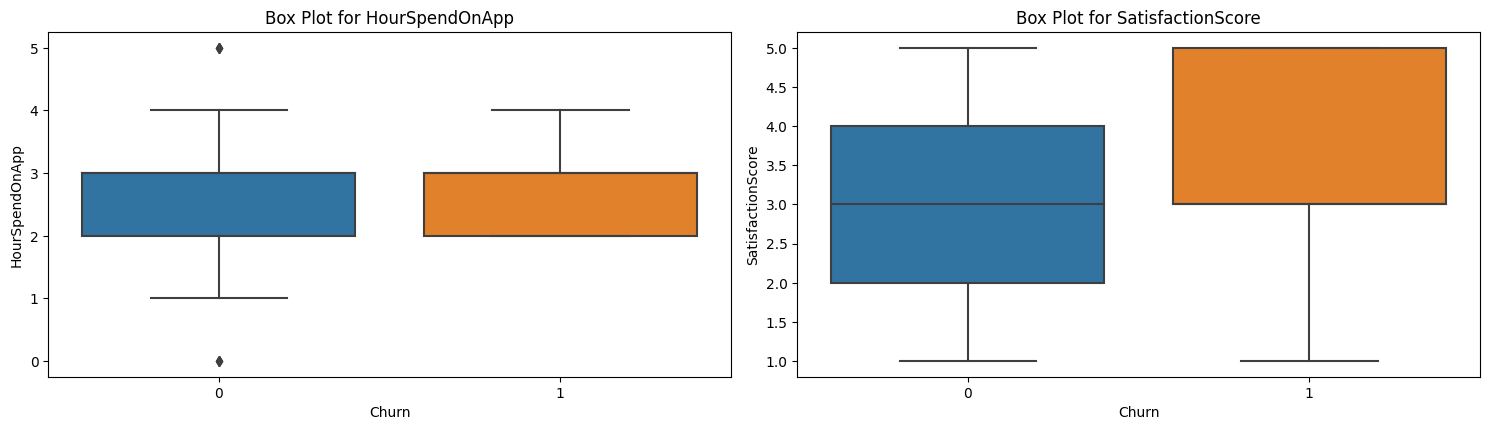

In [13]:
features_for_box_plot = ['HourSpendOnApp', 'SatisfactionScore', 'Churn']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(features_for_box_plot[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'Box Plot for {feature}')

plt.tight_layout()
plt.show()

In [14]:
value_counts = df['SatisfactionScore'].value_counts()
relative_frequencies = value_counts / len(df)

subtable = pd.DataFrame({'State': value_counts.index, 
                         'Frequency': value_counts.values, 
                         'Relative Frequency': relative_frequencies.values})
subtable

,State,Frequency,Relative Frequency
0,3,1698,0.301599
1,1,1164,0.206750
2,5,1108,0.196803
3,4,1074,0.190764
4,2,586,0.104085


Most frequent SatisfactionScore is 3 with a frequence of 30%

In [15]:
# from ydata_profiling import ProfileReport
# slice_df = df.iloc[:, :10]
# report = ProfileReport(df, title='My Data', minimal=True)
# report.to_file("ecommerce.html")

EDA

We proceed to follow the variables description we did in the first step and analyse, handling missing values first, and pre-processing them one by one if necessary later.

"Tenure" has 9% of zeros due to the longevity in the company and it has 4.7% of missing values which we proceed to handle with the mean to maintain the overall distribution of this feature

In [16]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].mean())

As we saw in Overview, Preferred login device has 'mobile phone' and 'phone' which we assume are both same

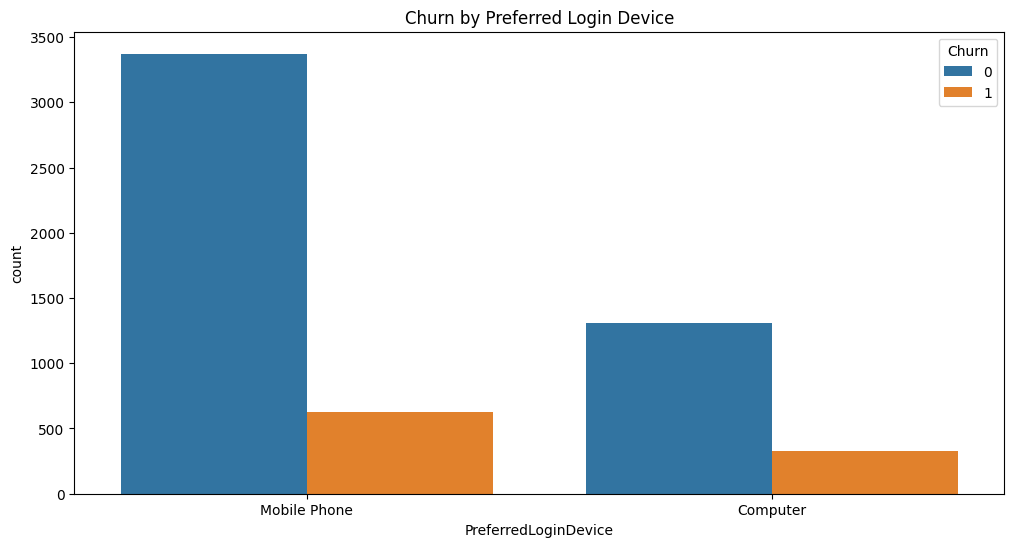

In [17]:
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

plt.figure(figsize=(12, 6))
sns.countplot(x='PreferredLoginDevice', hue='Churn', data=df)
plt.title('Churn by Preferred Login Device')
plt.show()

Let's replace the missing values of 'WarehouseToHome' with the median

In [18]:
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)

Is there any realtionship between Churn and Gender?

In [19]:
df['Gender'].value_counts()

Gender
Male      3384
Female    2246
Name: count, dtype: int64

In [20]:
gender_churn_counts = df.groupby(['Gender', 'Churn']).size().unstack()
gender_churn_counts['Total'] = gender_churn_counts.sum(axis=1)
gender_churn_counts['Churn Percentage'] = (gender_churn_counts[1] / gender_churn_counts['Total']) * 100

print(gender_churn_counts)

Churn      0    1  Total  Churn Percentage
Gender                                    
Female  1898  348   2246         15.494212
Male    2784  600   3384         17.730496


Since the percentage of churn in male customers is slightly higher than that of female customers, we can assume that we should focus more on addressing the needs of male customers to positively affect our target variable and keep working on Female Gender to increse the Total number of customers

what about HourSpendOnApp comparing that with Gender?

HourSpendOnApp has a tendency as three hours as the html report shows. First at all we decide to handle the 4.5% of missing values with a mean and keep save the same frequency. Then we focus on a relationship between HourSpendOnApp with Gender

In [21]:
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mean(), inplace=True)

We perform the independent t-test to determine if there is a significant difference between the mean of HourSpendOnApp in Male & HourSpendOnApp in Female

In [22]:
from scipy.stats import ttest_ind

In [23]:
male_data = df[df['Gender'] == 'Male']['HourSpendOnApp']
female_data = df[df['Gender'] == 'Female']['HourSpendOnApp']


mean_male = male_data.mean()
mean_female = female_data.mean()


t_statistic, p_value = ttest_ind(male_data, female_data, equal_var=False)

print(f'Mean HourSpendOnApp (Male): {mean_male}')
print(f'Mean HourSpendOnApp (Female): {mean_female}')
print(f'T-test p-value: {p_value}')

Mean HourSpendOnApp (Male): 2.920991368409478
Mean HourSpendOnApp (Female): 2.947420571972913
T-test p-value: 0.17027252509743426


There is no strong statistical evidence to suggest that the average "HourSpendOnApp" is significantly different between male and female customers. The p-value of 0.17027252509743426 is greater than the conventional threshold of 0.05, indicating that any observed differences in means could be due to random variation.

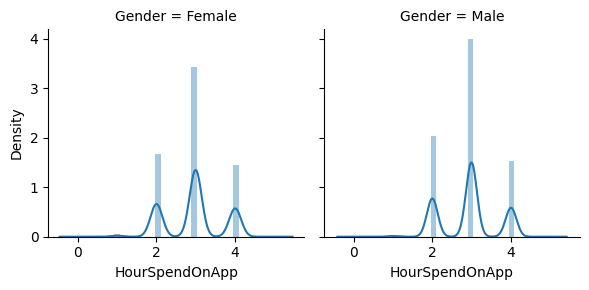

In [24]:
import warnings
warnings.filterwarnings("ignore")

facegrid = sns.FacetGrid(df, col='Gender')
facegrid.map(sns.distplot, 'HourSpendOnApp')

Let's keep going analysing the missing values of our dataset. We decide to apply the mean to the last four variables which have missing values too and they are: 
OrderAmountHikeFromlastYear has 265 (4.7%),
CouponUsed has 256 (4.5%),
OrderCount has 258 (4.6%),
DaySinceLastOrder has 307 (5.5%)

In [25]:
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].mean(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].mean(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].mean(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].mean(), inplace=True)

In [26]:
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values in the DataFrame.")
else:
    print("Missing Values:")


No missing values in the DataFrame.


Now we don't have any missing values and we can focus on City Tier variable and comparing it with other features. Which CityTier has the highest OrderCount?

In [27]:
#pip install -r requirements.txt

In [28]:
df['OrderCount'] = df['OrderCount'].astype(int)
df.groupby('CityTier')[['OrderCount']].sum()

,OrderCount
CityTier,
1,10835
2,627
3,5471


The City Tier with the highest OrderCount is 1 with 	10835 orders

In [29]:
fig = px.box(df, x='Churn', y = 'Tenure')
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
fig.update_xaxes(title_text='Churn', row=1, col=1)
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)
fig.show()

The median tenure for churned customers is significantly lower (1) than non-churned customers (10). It suggests that customers with lower tenure are more likely to churn.

Data Pre-processing

Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()


In [32]:
df['CouponUsed'] = df['CouponUsed'].astype(int)
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].astype(int)
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear      int32
CouponUsed                       int32
OrderCount                       int32
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

Convert categorical columns to numerical representations

In [33]:
categorical_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])


In [34]:
correlation_matrix = df.corr()
churn_corr_vector = correlation_matrix['Churn'].sort_values(ascending = False)
churn_corr_vector

Churn                          1.000000
Complain                       0.250188
MaritalStatus                  0.140316
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
PreferedOrderCat               0.104569
CityTier                       0.084703
WarehouseToHome                0.069544
NumberOfAddress                0.043931
Gender                         0.029264
HourSpendOnApp                 0.018126
CouponUsed                    -0.001430
OrderAmountHikeFromlastYear   -0.007075
CustomerID                    -0.019083
PreferredPaymentMode          -0.026519
OrderCount                    -0.028308
PreferredLoginDevice          -0.051099
CashbackAmount                -0.154118
DaySinceLastOrder             -0.156152
Tenure                        -0.335513
Name: Churn, dtype: float64

<Axes: >

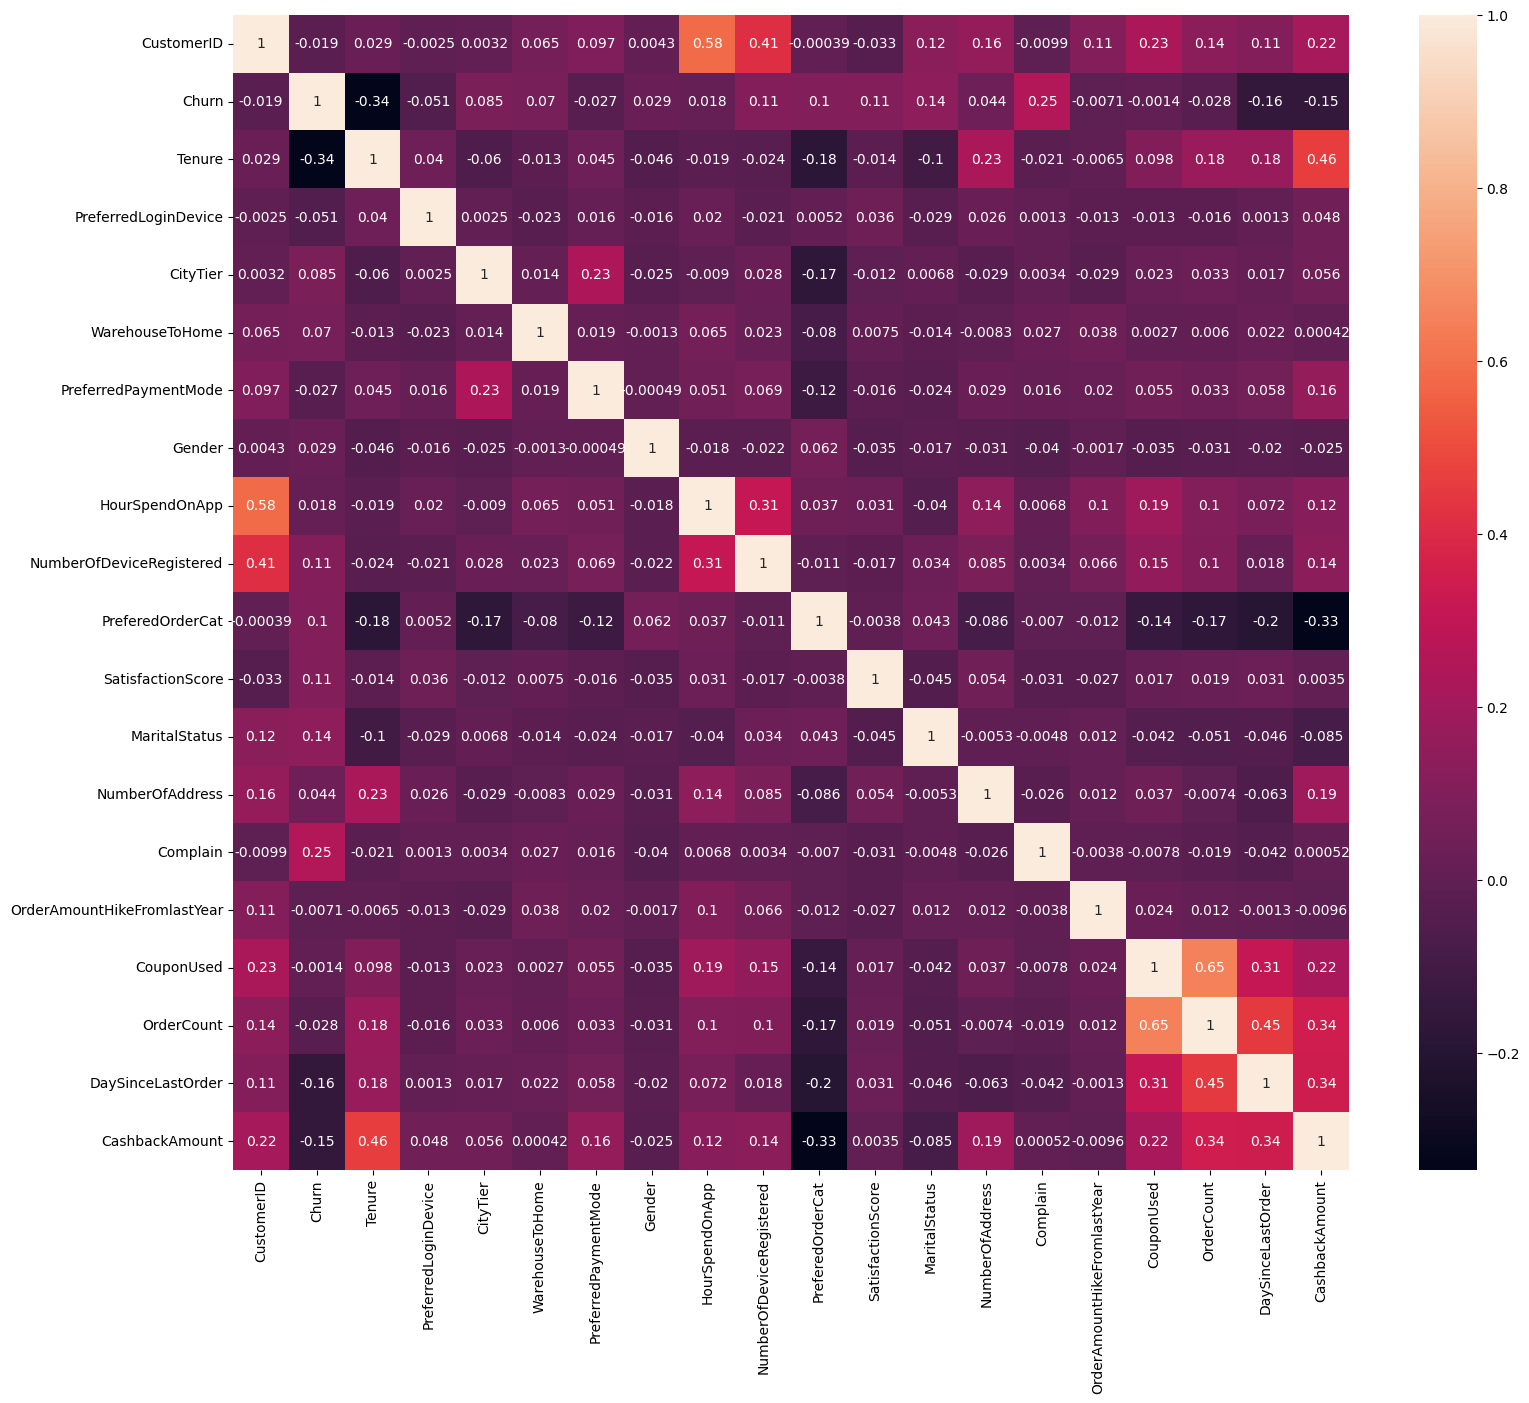

In [35]:
plt.figure(figsize = (18,15))
sns.heatmap(df.corr() , annot = True)

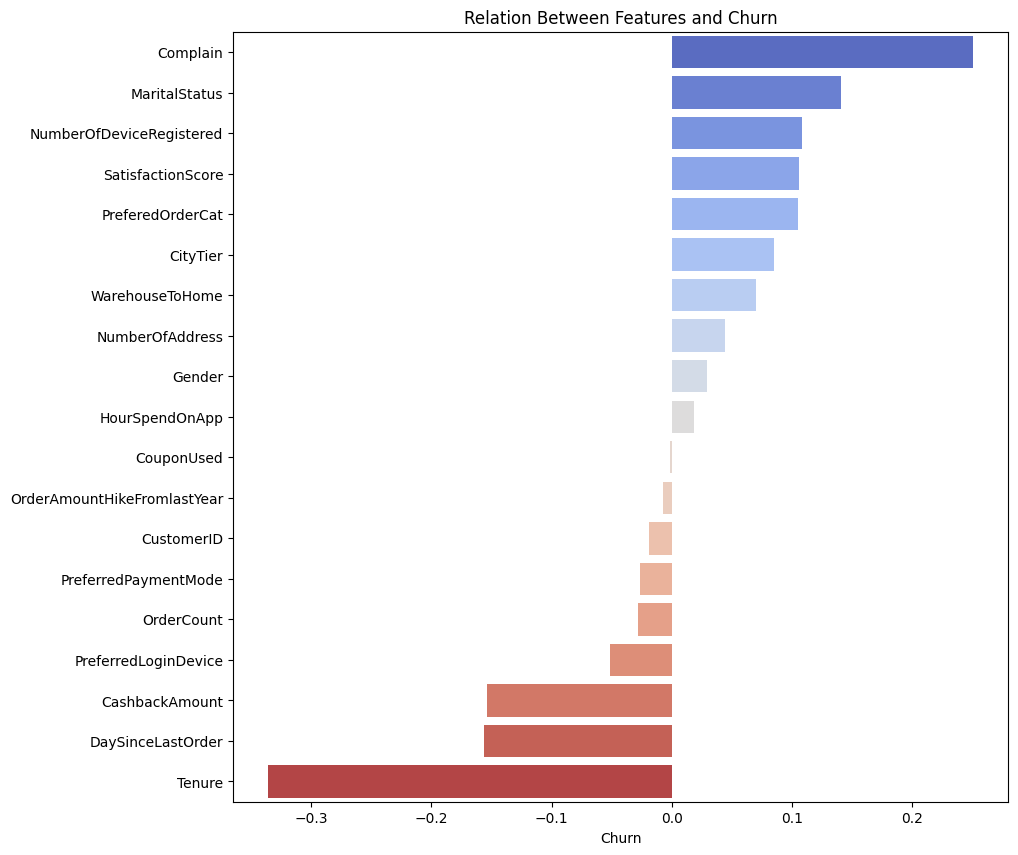

In [36]:
plt.figure(figsize=(10, 10))
sns.barplot(x=churn_corr_vector.drop('Churn'), y=churn_corr_vector.drop('Churn').index, palette='coolwarm')
plt.title('Relation Between Features and Churn')
plt.show()

We now that negative correlation means that as one variable increases, the other tends to decrease. For example: the lower is the Tenure, the higher is the probability to get a churn, as e saw in the first step of the Overview of the capstone. This is why we chose positive & negative values as well of the correlation matrix we just did. 

But in our case, let's also take the example if "Days Since Last Order". So, while it might seem counterintuitive that as "Days Since Last Order" increases, the likelihood of churn also increases, it's still a negative correlation because it's the trend of the data points that matters. where longer intervals between purchases are associated with higher churn rates.

In [37]:
print(churn_corr_vector.drop('Churn').index)

Index(['Complain', 'MaritalStatus', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'PreferedOrderCat', 'CityTier', 'WarehouseToHome',
       'NumberOfAddress', 'Gender', 'HourSpendOnApp', 'CouponUsed',
       'OrderAmountHikeFromlastYear', 'CustomerID', 'PreferredPaymentMode',
       'OrderCount', 'PreferredLoginDevice', 'CashbackAmount',
       'DaySinceLastOrder', 'Tenure'],
      dtype='object')


Let's use only the features we assume they have more relevant correlation with our target variable

In [38]:
reason_of_churn_chosen = ['Complain', 'MaritalStatus', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'PreferedOrderCat','CashbackAmount', 'DaySinceLastOrder', 'Tenure']

In [39]:
df[reason_of_churn_chosen]

,Complain,MaritalStatus,NumberOfDeviceRegistered,SatisfactionScore,PreferedOrderCat,CashbackAmount,DaySinceLastOrder,Tenure
0,1,2,3,2,2,159.93,5.000000,4.000000
1,1,2,4,3,3,120.90,0.000000,10.189899
2,1,2,4,3,3,120.28,3.000000,10.189899
3,0,2,4,5,2,134.07,3.000000,0.000000
4,0,2,3,5,3,129.60,3.000000,0.000000
...,...,...,...,...,...,...,...,...
5625,0,1,2,1,2,150.71,4.000000,10.000000
5626,0,1,5,5,0,224.91,4.543491,13.000000
5627,1,1,2,4,2,186.42,4.000000,1.000000
5628,0,1,5,4,2,178.90,9.000000,23.000000


Hyperparameter Tuning and Cross-Validation

These steps involve optimizing the performance of our model and assessing its generalization ability using techniques like GridSearchCV and k-fold cross-validation. We ensure that the optimization process is based on the original distribution of the data, so we tune the hyperparameters and evaluating the model's performance before the oversampling we do at the end.

## Modelling

In [40]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


In [41]:
X = df[reason_of_churn_chosen]
y = df['Churn']

### splitting 30% of testing

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify=y)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((3941, 8), (1689, 8), (3941,), (1689,))

Standardize numerical features

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training and Testing with GridSearchCV using cv=10

## Logistic Regression

In [44]:
logreg = LogisticRegression(random_state=42)

Hyperparameter tuning

In [45]:
parameters_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_logreg = GridSearchCV(logreg, parameters_logreg, cv=10)
grid_logreg.fit(X_train_scaled, y_train)
print("Best Parameter:", grid_logreg.best_params_)

Best Parameter: {'C': 0.1}


Model evaluation

In [46]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

Using the best estimator found during hyperparameter tuning

In [47]:
best_model = grid_logreg.best_estimator_

Evaluate the best model on the test set

In [48]:
evaluate_model(best_model, X_train_scaled, y_train, X_test_scaled, y_test)


Confusion Matrix:
[[1362   43]
 [ 193   91]]


Plot the confusion matrix although it seems to be an overfitted model

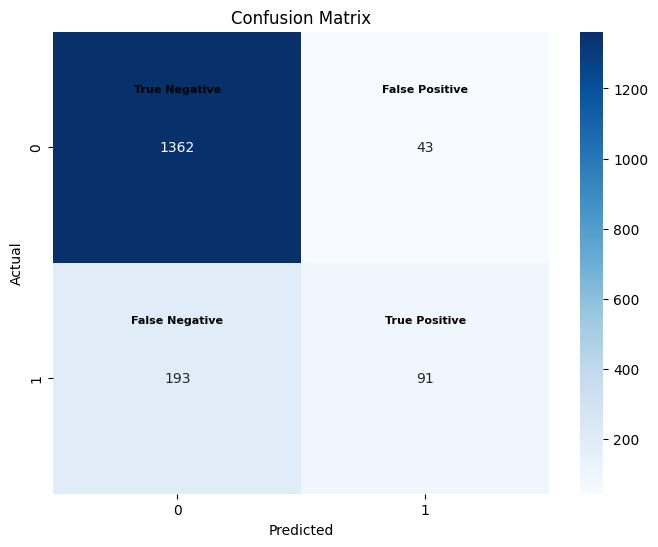

In [49]:
conf_matrix = [[1362, 43],
               [193, 91]]
labels = [['True Negative', 'False Positive'],
          ['False Negative', 'True Positive']]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.25, labels[i][j], ha='center', va='center', fontsize=8, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

looking at the confusion matrix of logistic regression model, we can bserve that there are 193 false negative where the model iincorrectly predicted that customers did not churn ( class 0 ) when they actually did churn ( class 1 ). In the confusion matrix, this manifests a high counts of True Positives but low counts of False Positives (FP) and False Negatives (FN). the mainly reason of that is because we are working which an inbalanced target variable

## Random Forest Classifier

In [50]:
rf_classifier = RandomForestClassifier(random_state=42)
parameters_rf = {'n_estimators': [50, 100, 150, 200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}
grid_rf = GridSearchCV(rf_classifier, parameters_rf, cv=10)
grid_rf.fit(X_train, y_train)

print("\nRandom Forest Classifier:")
print("Best Parameters:", grid_rf.best_params_)
evaluate_model(grid_rf.best_estimator_, X_train, y_train, X_test, y_test)


Random Forest Classifier:
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Confusion Matrix:
[[1384   21]
 [  76  208]]


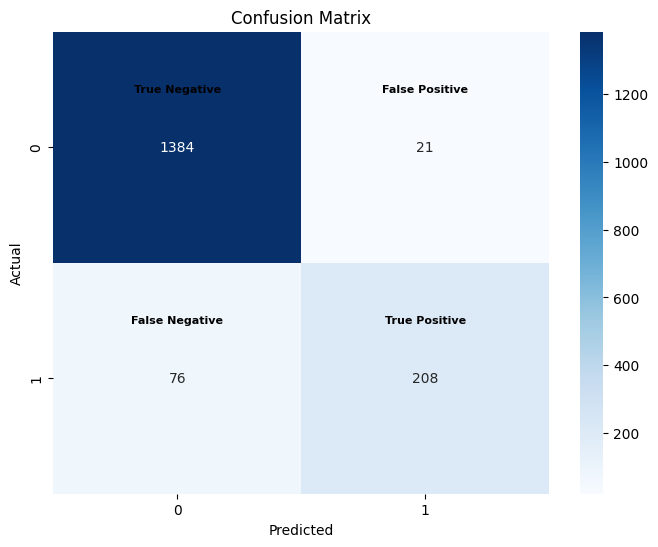

In [51]:
conf_matrix = [[1384,   21],
               [76,   208]]
labels = [['True Negative', 'False Positive'],
          ['False Negative', 'True Positive']]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.25, labels[i][j], ha='center', va='center', fontsize=8, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Support Vector Machine

In [52]:
svm_classifier = SVC(probability=True, random_state=42)
parameters_svm = {'C': [0.1, 1, 10],
                  'gamma': [0.01, 0.1, 1],
                  'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(svm_classifier, parameters_svm, cv=10)
grid_svm.fit(X_train_scaled, y_train)

print("\nSupport Vector Machine (SVM):")
print("Best Parameters:", grid_svm.best_params_)
evaluate_model(grid_svm.best_estimator_, X_train_scaled, y_train, X_test_scaled, y_test)


Support Vector Machine (SVM):
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Confusion Matrix:
[[1363   42]
 [ 158  126]]


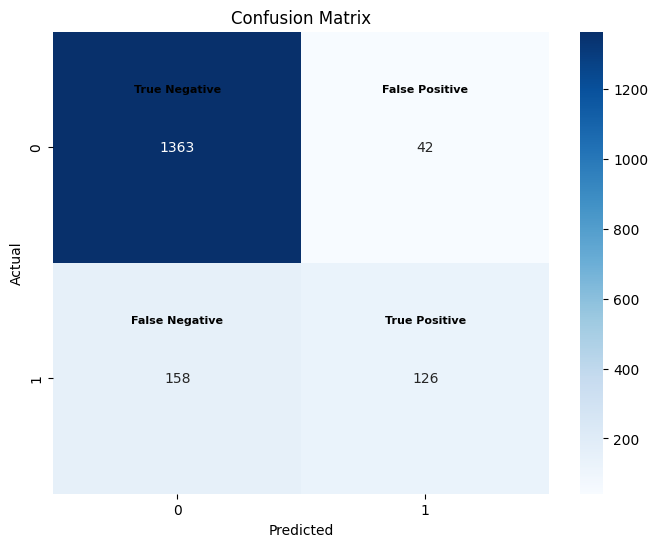

In [53]:
conf_matrix = [[1363,   42],
               [ 158,  126]]
labels = [['True Negative', 'False Positive'],
          ['False Negative', 'True Positive']]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.25, labels[i][j], ha='center', va='center', fontsize=8, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Looking at the confusion matrices it looks that RF is the best approach also beacause of the accuracy of the model. Let's analyze the three models and compare them based on the ROC AUC:

Logistic Regression ROC AUC: 0.8430
Random Forest ROC AUC: 0.9725
Support Vector Machine ROC AUC: 0.8519


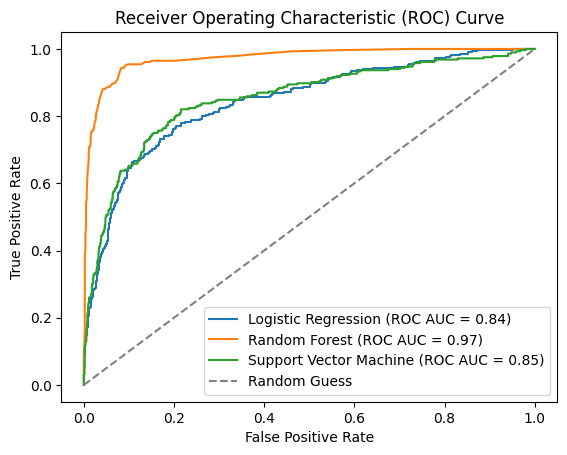

In [74]:
from sklearn.metrics import roc_curve
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"{model_name} ROC AUC: {roc_auc:.4f}")
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (ROC AUC = {roc_auc:.2f})')

model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = SVC(probability=True)  

evaluate_model(model1, X_train, y_train, X_test, y_test, 'Logistic Regression')
evaluate_model(model2, X_train, y_train, X_test, y_test, 'Random Forest')
evaluate_model(model3, X_train, y_train, X_test, y_test, 'Support Vector Machine')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()



Random forest looks to be the best approach

Feature Importance

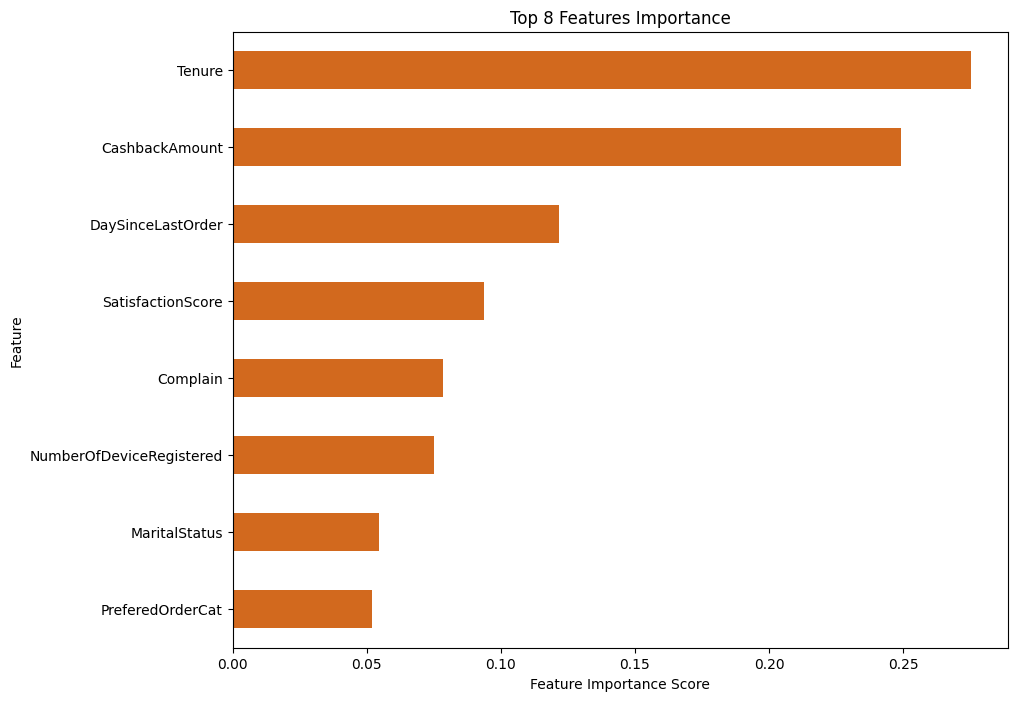

In [55]:
feat_importances_rf = pd.Series(grid_rf.best_estimator_.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 8))
feat_importances_rf.nlargest(8).plot(kind='barh', color='chocolate')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Top 8 Features Importance')
plt.gca().invert_yaxis() 

In [56]:
# pip install shap

<Figure size 1000x600 with 0 Axes>

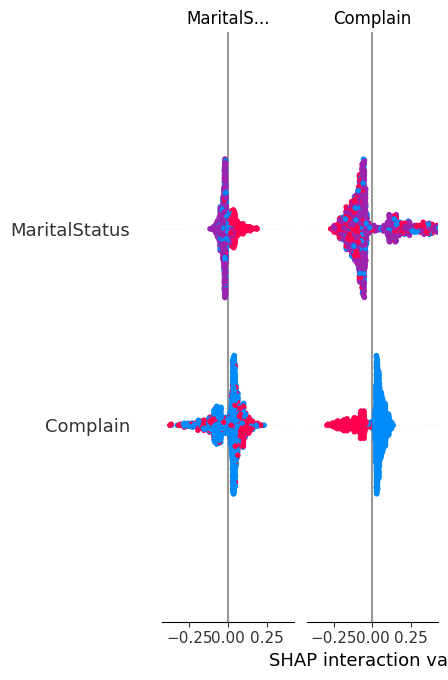

In [57]:
import shap

rf_model = grid_rf.best_estimator_
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)
plt.figure(figsize=(10, 6)) 
shap.summary_plot(shap_values, X_test, show=False)
plt.show()

Complain" and "MaritalStatus" are directly related to churn prediction because both have instances with positive SHAP values contributing to churn prediction

while Tenure and CashbackAmount may be the top features according to feature importance metrics, MaritalStatus and Complain might have a more significant impact on individual predictions, as suggested by the SHAP values.

### Oversampling the Minority Class due to retains all information from the minority class

In [58]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

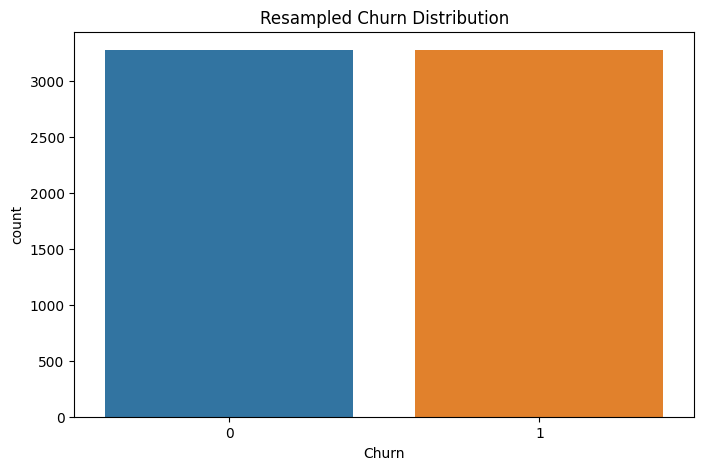

In [59]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_resampled, data=df)  
plt.title('Resampled Churn Distribution')
plt.show()

Model evaluation

In [60]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)


Evaluate the best model on the test set using the best estimator found during hyperparameter tuning after the oversampling

In [61]:
logreg = LogisticRegression(random_state=42)
parameters_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_logreg = GridSearchCV(logreg, parameters_logreg, cv=10)
grid_logreg.fit(X_train_resampled, y_train_resampled)
print("Best Parameter:", grid_logreg.best_params_)
evaluate_model(grid_logreg.best_estimator_, X_train_resampled, y_train_resampled, X_test_scaled, y_test)


rf_classifier = RandomForestClassifier(random_state=42)
parameters_rf = {'n_estimators': [50, 100, 150, 200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}
grid_rf = GridSearchCV(rf_classifier, parameters_rf, cv=10)
grid_rf.fit(X_train_resampled, y_train_resampled)
print("\nRandom Forest Classifier:")
print("Best Parameters:", grid_rf.best_params_)
evaluate_model(grid_rf.best_estimator_, X_train_resampled, y_train_resampled, X_test_scaled, y_test)


svm_classifier = SVC(probability=True, random_state=42)
parameters_svm = {'C': [0.1, 1, 10],
                  'gamma': [0.01, 0.1, 1],
                  'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(svm_classifier, parameters_svm, cv=10)
grid_svm.fit(X_train_resampled, y_train_resampled)
print("\nSupport Vector Machine (SVM):")
print("Best Parameters:", grid_svm.best_params_)
evaluate_model(grid_svm.best_estimator_, X_train_resampled, y_train_resampled, X_test_scaled, y_test)


Best Parameter: {'C': 0.01}

Random Forest Classifier:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

Support Vector Machine (SVM):
Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


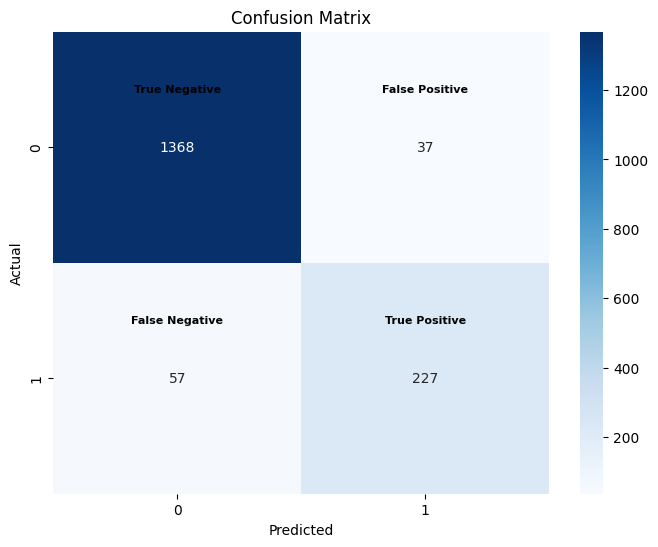

In [62]:
conf_matrix = [[1368,  37],
               [57  , 227]]

labels = [['True Negative', 'False Positive'],
          ['False Negative', 'True Positive']]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.25, labels[i][j], ha='center', va='center', fontsize=8, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Logistic Regression ROC AUC: 0.8353
Random Forest ROC AUC: 0.9708
Support Vector Machine ROC AUC: 0.8710


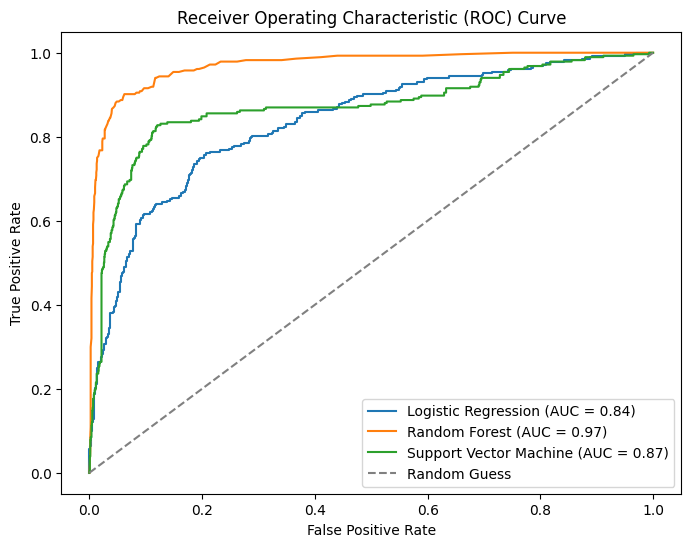

In [72]:
from sklearn.metrics import roc_auc_score, roc_curve

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"{model_name} ROC AUC: {roc_auc:.4f}")
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    return fpr, tpr, roc_auc

logreg_fpr, logreg_tpr, logreg_auc = evaluate_model(grid_logreg.best_estimator_, X_train_resampled, y_train_resampled, X_test_scaled, y_test, 'Logistic Regression')
rf_fpr, rf_tpr, rf_auc = evaluate_model(grid_rf.best_estimator_, X_train_resampled, y_train_resampled, X_test_scaled, y_test, 'Random Forest')
svm_fpr, svm_tpr, svm_auc = evaluate_model(grid_svm.best_estimator_, X_train_resampled, y_train_resampled, X_test_scaled, y_test, 'Support Vector Machine')

plt.figure(figsize=(8, 6))
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'Support Vector Machine (AUC = {svm_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Based on the Area Under the Curve (AUC) scores, the Random Forest model performed the best during before and after the oversampling.

#### Before oversampling:

Logistic Regression: 0.8430

Random Forest: 0.9715

Support Vector Machine: 0.8519


#### After oversampling:

Logistic Regression: 0.8358

Random Forest: 0.9730

Support Vector Machine: 0.8756


The Random Forest model can be considered the best model for this classification task.

<Figure size 1000x600 with 0 Axes>

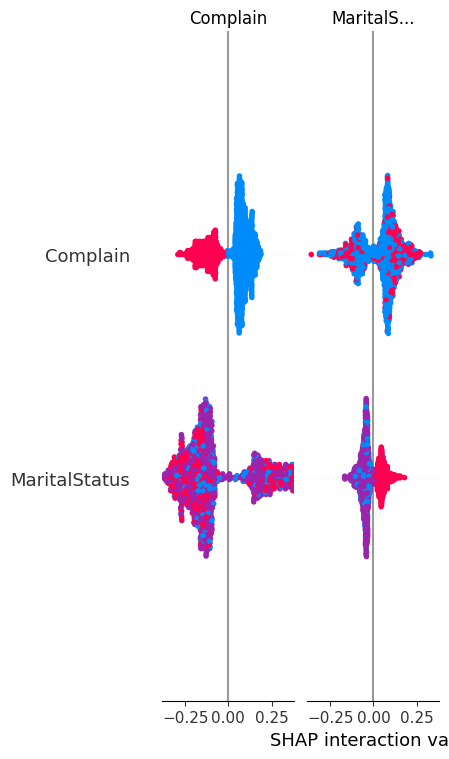

In [69]:
rf_model_after_oversampling = grid_rf.best_estimator_
explainer = shap.TreeExplainer(rf_model_after_oversampling)
shap_values = explainer.shap_values(X_test_scaled)
plt.figure(figsize=(10, 6)) 
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, max_display=len(X.columns), show=False)
plt.show()

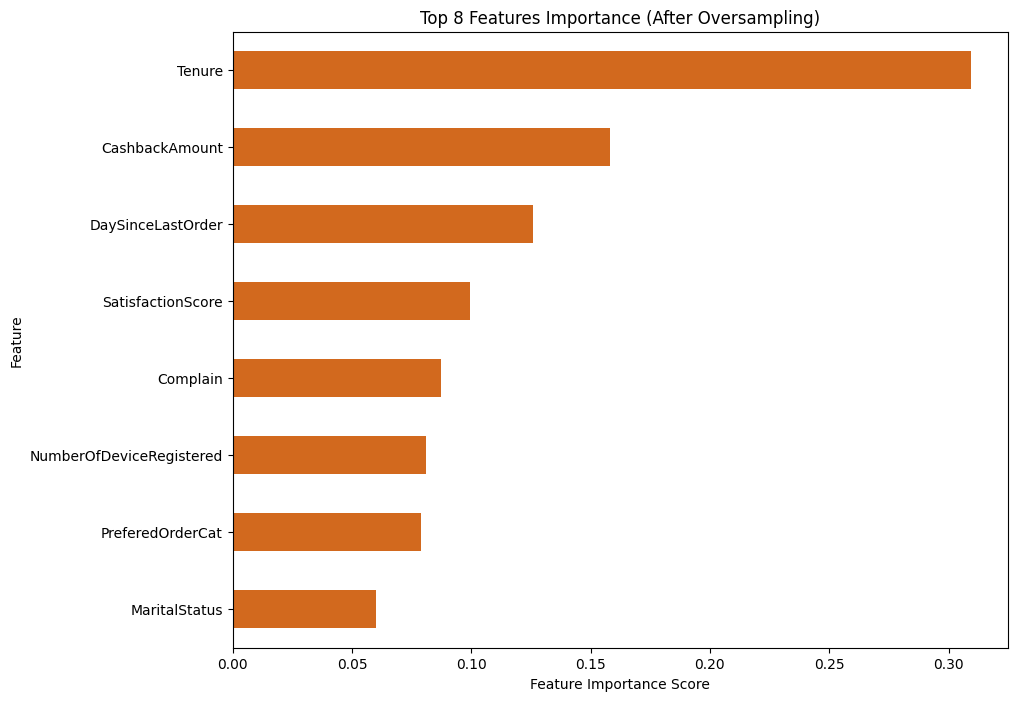

In [ ]:
feat_importances_rf_after_oversampling = pd.Series(rf_model_after_oversampling.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 8))
feat_importances_rf_after_oversampling.nlargest(8).plot(kind='barh', color='chocolate')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Top 8 Features Importance (After Oversampling)')
plt.gca().invert_yaxis() 
plt.show()

## Conclusion
Churn prediction is one of the most common machine learning practise in everyday businesses. once we applied our knowledge, we used different hyperparamethers and kfold and running different models, to finally decide which were the best comparing to after and before oversampling the target variable. Finally found out the features that had more influence on prediction which are Tenure and cashback amount, and complain and maritial status for the shap technique. 

References


https://seaborn.pydata.org/generated/seaborn.violinplot.html


https://www.tutorialspoint.com/python_data_science/python_p_value.htm


Brownlee, J. (2020). Imbalanced Classification with Python. Machine Learning Mastery


Müller, A.C. and Guido, S. (2018) Introduction to machine learning with python: A guide for data scientists. Sebastopol: O’Reilly Media


https://www.kaggle.com/code/bhartiprasad17/customer-churn-prediction


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


McKinney, W. (2022) Python for Data Analysis: Data wrangling with pandas, NumPy, and Jupyter. Beijing: O’Reilly


iguazio.com (2014). What is Model Accuracy in Machine Learning. [online] Iguazio. Available at: https://www.iguazio.com/glossary/model-accuracy-in-ml/ 


https://medium.com/@ilyurek/roc-curve-and-auc-evaluating-model-performance-c2178008b02


https://medium.com/towards-data-science/a-complete-shap-tutorial-how-to-explain-any-black-box-ml-model-in-python-7538d11fae94


https://medium.com/@data.science.enthusiast/explain-any-machine-learning-model-in-python-shap-4caf1c343f3


https://chat.openai.com/


https://www.posterpresentations.com/free-poster-templates.html#


https://github.com/aig3rim/Interpret_random_forest_classifier_using_SHAP/blob/master/Random_forest_classifier_SHAP.ipynb